# Introduction

This project proposed by [Data Professor](https://www.youtube.com/channel/UCV8e2g4IWQqK71bbzGDEI4Q) aims to build models predicting molecules binding to the Beta-Lactamase protein. For the complete project description, see this [video](https://www.youtube.com/watch?v=_GtEgiWWyK4) on the [Data Professor](https://www.youtube.com/channel/UCV8e2g4IWQqK71bbzGDEI4Q) channel.
This notebook comports the initial EDA and data processing. 

# I Initialization

In [1]:
###################
# I Initialization
###################

#+++++++++++++++++++++++++++
# Install required libraries
#+++++++++++++++++++++++++++

!pip install wget > NULL
!pip install padelpy > NULL

#+++++++++++++++
# Load libraries
#+++++++++++++++

import os
import wget
from pathlib import Path # for path in Windows and Unix
import zipfile
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import matplotlib.pyplot as plt

#+++++++++++++++++++++++++++
# Define the working folders
#+++++++++++++++++++++++++++

# see https://careerkarma.com/blog/python-list-files-in-directory/
# See https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
project_data_folder = Path('/kaggle/input/betalactamase/')
os.mkdir('/kaggle/temp/')
project_temp_folder = Path('/kaggle/temp/')
project_result_folder = Path('/kaggle/working/')

#+++++++++++++++++
# Load the dataset
#+++++++++++++++++

# Combine all csv files into one single dataset
# see https://www.kaggle.com/thedataprof/getting-started-with-the-beta-lactamase-dataset

all_csv = glob.glob('/kaggle/input/betalactamase/*.csv')
df = pd.concat( (pd.read_csv(csv)) for csv in all_csv )
df.head()

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,250.0,/s,Kcat,NaN,Metallo-beta-lactamase,single protein format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,=,8.0,/s,Kcat,NaN,Metallo-beta-lactamase,single protein format
2,CHEMBL44354,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...,=,3.0,/s,Kcat,NaN,Metallo-beta-lactamase,single protein format
3,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/s,Kcat,NaN,Metallo-beta-lactamase,single protein format
4,CHEMBL186,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[N...,=,3.0,/s,Kcat,NaN,Metallo-beta-lactamase,single protein format


# II EDA

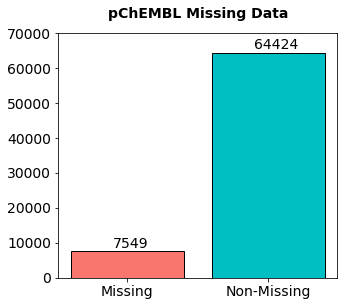

In [2]:
########
# II EDA
########

#+++++++++++++++++++++++++++++++++++++
# Visualize the number of missing data
#+++++++++++++++++++++++++++++++++++++

# See https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb

missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [3]:
#+++++++++++++++++++++++++++++++++++++
# Non-missing data with pChEMBL value
#+++++++++++++++++++++++++++++++++++++

# Non-missing data with pChEMBL value
import numpy as np
df2 = df[df.pchembl_value.notnull()]

# see https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb
print('Number of unique ChEMBL ID:', str(len(df.molecule_chembl_id.unique()) )  )
print('Total number of ChEMBL ID: ', str(len(df)) )
print('Number of missing ChEMBL ID: ', str(df.molecule_chembl_id.isnull().sum()) )

Number of unique ChEMBL ID: 64436
Total number of ChEMBL ID:  71973
Number of missing ChEMBL ID:  0


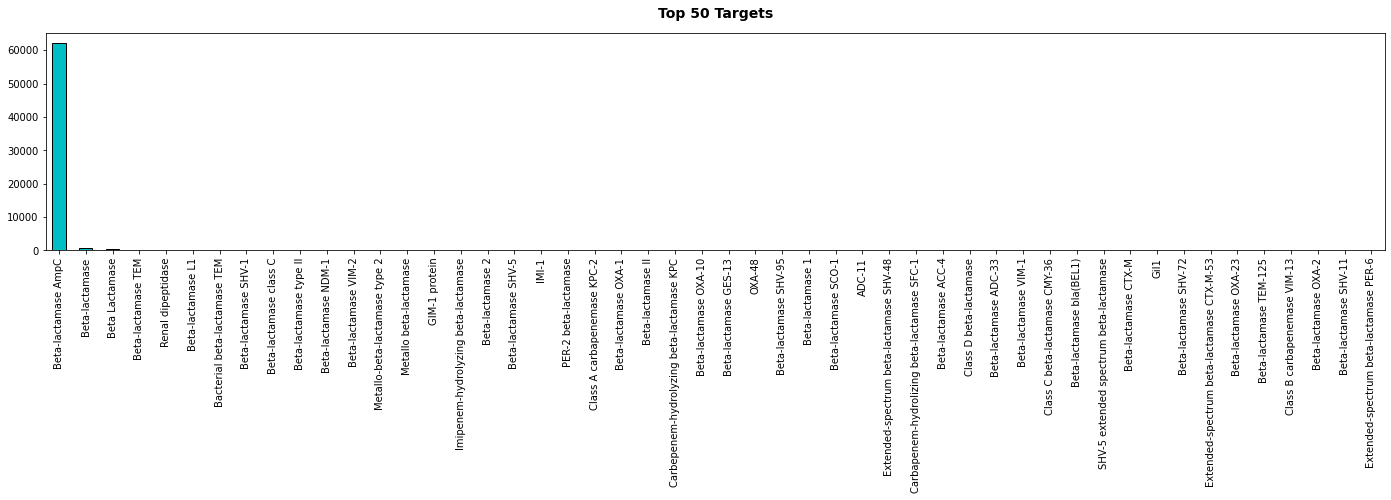

In [4]:
#++++++++++++++++
# Top 50 targets
#++++++++++++++++

# https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb
import matplotlib.pyplot as plt

unique = len(df.molecule_chembl_id.unique())
not_unique = len(df) - unique

x = ['Unique', 'Redundant']
y = [unique, not_unique]

df2.target_pref_name.value_counts()[0:50].plot.bar(figsize=(24,4), color='#00BFC4', ec='black')

plt.title('Top 50 Targets', fontsize=14, fontweight='black', pad=15)
plt.show()

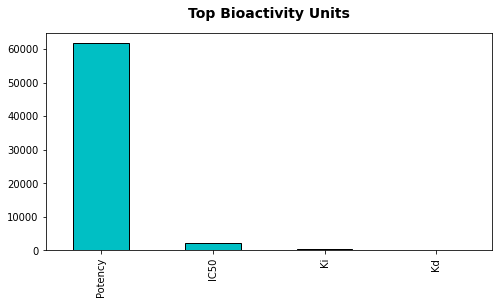

In [5]:
#+++++++++++++++++++++++++
# Top 10 Bioactivity units
#+++++++++++++++++++++++++

# see https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb
df2.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

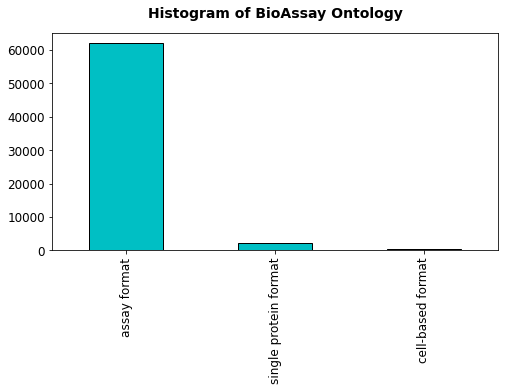

In [6]:
#++++++++++++++++++
# Assay categories 
#++++++++++++++++++

#see https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb
bao_labels = df2.bao_label.value_counts()
bao_labels.plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of BioAssay Ontology', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

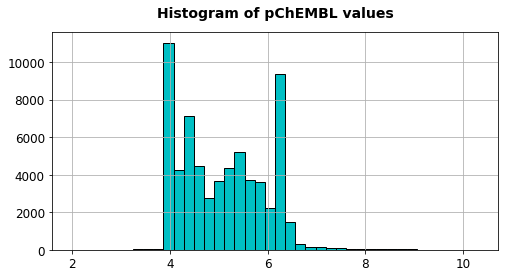

In [7]:
#+++++++++++++++
# pchembl values
#+++++++++++++++

# see https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb
df2.pchembl_value.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# III Data Wrangling

In [8]:
####################
# III Data Wrangling
####################

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Remove row with missing canonical_smiles and missing pchembl_value
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

df = df[df['canonical_smiles'].notna()]
df = df[df['pchembl_value'].notna()]

In [9]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Extract from the dataset the majority molecule: molecule_chembl_id
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# see https://github.com/dataprofessor/beta-lactamase/blob/main/beta_lactamase_data.ipynb

df = df[df['target_pref_name'] == 'Beta-lactamase AmpC']
df = df[df['standard_type'] == 'Potency']
df == df[df['bao_label'] == 'assay format']

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
625,True,True,True,True,True,True,True,True,True
626,True,True,True,True,True,True,True,True,True
627,True,True,True,True,True,True,True,True,True
628,True,True,True,True,True,True,True,True,True
629,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
62340,True,True,True,True,True,True,True,True,True
62341,True,True,True,True,True,True,True,True,True
62342,True,True,True,True,True,True,True,True,True
62343,True,True,True,True,True,True,True,True,True


In [10]:
#++++++++++++++++++++++++++++++
# Removes duplicated nolecules
#+++++++++++++++++++++++++++++

# See https://github.com/sayalaruano/MidtermProject-MLZoomCamp/blob/main/EDA_beta_lactamase_drug_discovery_project.ipynb

def combine_molecule_duplicates(dataset):
    '''
    Function to replace duplicated molecules by one single row with mean of standard_value and 
    pchembl_value of duplicated rows. The replacement is applied only if standard deviation of 
    pchembl_value is lower than 2.

        Parameters:
            dataset (DataFrame): A pandas DataFrame with duplicated molecules
        
        Returns: 
            dataset (DataFrame): A pandas DataFrame without duplicated molecules
    '''
    # Calculate standard deviation of all molecules
    std_by_uniqueID = dataset.groupby("molecule_chembl_id").std()

    # Filter standard deviation of duplicated molecules lower than 2
    std_by_uniqueID = std_by_uniqueID[std_by_uniqueID.pchembl_value < 2]

    # Calculate mean of all molecules
    mean_by_uniqueID = dataset.groupby("molecule_chembl_id").mean()
    
    # Filter mean of duplicated molecules that have standard deviation lower than 2
    mean_by_uniqueID = mean_by_uniqueID.filter(items = std_by_uniqueID.index, axis=0)

    # Create a dictionary of rows with mean values of standard_value and pchembl_value
    new_rows = {}

    for i in mean_by_uniqueID.index:
        rows = dataset.loc[dataset.molecule_chembl_id == i].copy()
        row = rows.iloc[0].copy()
        row.standard_value = mean_by_uniqueID.loc[i].standard_value
        row.pchembl_value = mean_by_uniqueID.loc[i].pchembl_value
        new_rows[i] = row
    
    # Convert dictionary to dataframa
    df_new_rows = pd.DataFrame(new_rows).T
    
    # Delete duplicated molecules from the original dataset
    dataset = dataset.drop_duplicates(subset=["molecule_chembl_id"], keep=False)

    # Add new rows to the original dataset
    dataset = pd.concat([dataset, df_new_rows], axis=0).reset_index(drop=True)

    return dataset

# Replace duplicated molecules by mean of their standard_value and pchembl_value
df = combine_molecule_duplicates(df)

In [11]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Use PaDelPy to convert smiles annotation to chemical structures infomrmations
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# See https://opensourcelibs.com/lib/padelpy
# See https://youtu.be/rEmDyZHz5U8
# See https://github.com/dataprofessor/padel

df2 = df[['canonical_smiles', 'molecule_chembl_id']]
file_path = project_temp_folder / 'molecule.smi'
df2.to_csv(file_path, sep='\t', index=False, header=False)

In [12]:
os.mkdir('/kaggle/temp/Fingerprints')

In [13]:
url = 'https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip'
file_path = project_temp_folder / 'Fingerprints' / 'fingerprints_xml.zip'
file_path = str(file_path)
wget.download(url, file_path)

'/kaggle/temp/Fingerprints/fingerprints_xml.zip'

In [14]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(str(project_temp_folder / 'Fingerprints'))

xml_files = glob.glob(str(project_temp_folder / 'Fingerprints/*.xml'))
xml_files.sort()

FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

fp = dict(zip(FP_list, xml_files))

In [15]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = str(project_temp_folder / 'Substructure.csv')
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(#mol_dir='molecule.smi', 
                mol_dir = str(project_temp_folder / 'molecule.smi'),
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL554891,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,CHEMBL1401836,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,CHEMBL1401837,0,1,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1519543,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,CHEMBL2369239,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61586,CHEMBL1599088,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
61587,CHEMBL268869,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
61588,CHEMBL260148,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
61589,CHEMBL85799,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [16]:
# combine descriptor and filtered dataset
df3 = pd.merge(df, descriptors, how ="inner", left_on=['molecule_chembl_id'], right_on=['Name'])

file_path = project_result_folder / 'beta-lactamase_filtered_dataset.csv'
df3.to_csv(file_path, index=False)